#Ejercicio 4

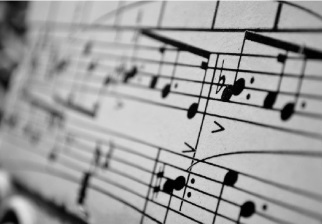

In [ ]:
from PIL import Image
from IPython.display import display
import cv2

img_vector = cv2. imread('img_04.jpg', cv2. IMREAD_GRAYSCALE)
img = Image.fromarray(img_vector)
display(img)

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# ---------- utilidades ----------
def load_gray(path, to_float01=False):
    """Carga imagen en escala de grises. Devuelve np.ndarray."""
    arr = np.array(Image.open(path).convert('L'))
    if to_float01:
        arr = arr.astype(np.float32) / 255.0
    else:
        arr = arr.astype(np.float32)  # escala 0..255 en float
    return arr

def mse(a, b):
    if a.shape != b.shape:
        # Si no coinciden tamaños, recorto a la intersección superior izquierda
        h = min(a.shape[0], b.shape[0])
        w = min(a.shape[1], b.shape[1])
        a = a[:h, :w]
        b = b[:h, :w]
    return float(np.mean((a - b) ** 2))

# ---------- configuración ----------
orig_path = Path("img_04.jpg")             # imagen previa a compresión
recon_pattern = "rec_S{S}.png"             # cambia esto si usaste otro nombre
S_list = list(range(5, 100, 5))            # 5,10,...,95 (lo que pide el 4a)
to_float01 = True                          # poné False si querés MSE en 0..255

# ---------- cálculo y gráfico ----------
orig = load_gray(orig_path, to_float01=to_float01)

Ss, mses = [], []
for S in S_list:
    rpath = Path(recon_pattern.format(S=S))
    if not rpath.exists():
        print(f"[AVISO] No encontré {rpath}, lo salto.")
        continue
    rec = load_gray(rpath, to_float01=to_float01)
    Ss.append(S)
    mses.append(mse(orig, rec))

# Mostrar resultados
for S, e in zip(Ss, mses):
    print(f"S={S:>2d}%  ->  MSE={e:.6f}")

plt.figure()
plt.plot(Ss, mses, marker='o')
plt.xlabel('Ahorro de espacio S [%]')
plt.ylabel('MSE')
plt.title('MSE vs. Ahorro S (usando imágenes original y reconstruidas)')
plt.grid(True)
plt.show()
